In [1]:
from helpers import * 
from canonical_order_kant import *
from simple_four_con import graph_data
from rel import * 
from boundary_cycle import *

In [2]:
co = KantCanonicalOrder(copy.deepcopy(graph_data))
re = RegularEdgeLabeling(co.data)
re.run()

ic| f"vn in loop {self.vn}": 'vn in loop 1'


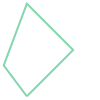

In [13]:
# get points all points and remove things and see if able to do convex hull acurately 
points = sp.MultiPoint([sp.Point(i) for i in get_emedding_coords(co.embed, co.G.nodes)])
points_list = [g for g in points.geoms]
boundary_line_string = points.convex_hull.boundary
boundary_line_string

In [17]:
fig = add_embedding_to_plotly(co.embed)
ext_nodes = []
for ix, point in enumerate(points_list):
    if not sp.Polygon(boundary_line_string).contains(point):
        add_geom_to_plotly(point, fig, label="exterior")

        assert co.embed[0][0] == points_list[0].x and co.embed[0][1] == points_list[0].y

        ext_nodes.append(ix)

fig.show()

In [18]:
ext_nodes

[0, 2, 4, 6]

In [22]:
G_ext = nx.subgraph(co.G, ext_nodes)
G_ext

In [24]:
# now need to get the cycle.. 
cycle = nx.find_cycle(G_ext, ext_nodes[0])
cycle

[(0, 2), (2, 4), (4, 6), (6, 0)]

In [25]:
cycle_list = [i[0] for i in cycle]
cycle_list

[0, 2, 4, 6]